# Lab | Cleaning Categorical Data

### 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

### 2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

In [3]:
customer_df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv", sep=",")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
# Standardizing column header names
customer_df.columns = [customer_df.columns[i].lower().replace(' ','_') for i in range(len(customer_df.columns))]

In [8]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [9]:
# converting effective_to_date column from object to datetime format

customer_df['effective_to_date'] = customer_df['effective_to_date'].astype('datetime64[ns]')

### 3. What should we do with the customer_id column?

Dropping "customer" column because any ID variable is unique and it is not contributing anything to our target column

In [10]:
customer_df=customer_df.drop(["customer"], axis=1)

### 4. Load the continuous and discrete variables into numericals_df and categorical_df variables

In [11]:
# Extracting numerical variables

numericals_df = customer_df[customer_df.select_dtypes("number").columns]

In [12]:
numericals_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [13]:
# Extracting categorical variables

categorical_df = customer_df[customer_df.select_dtypes("object").columns]
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 5.Plot every categorical variable.

What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

<AxesSubplot:title={'center':'Target VS state'}, xlabel='vehicle_size', ylabel='total_claim_amount'>

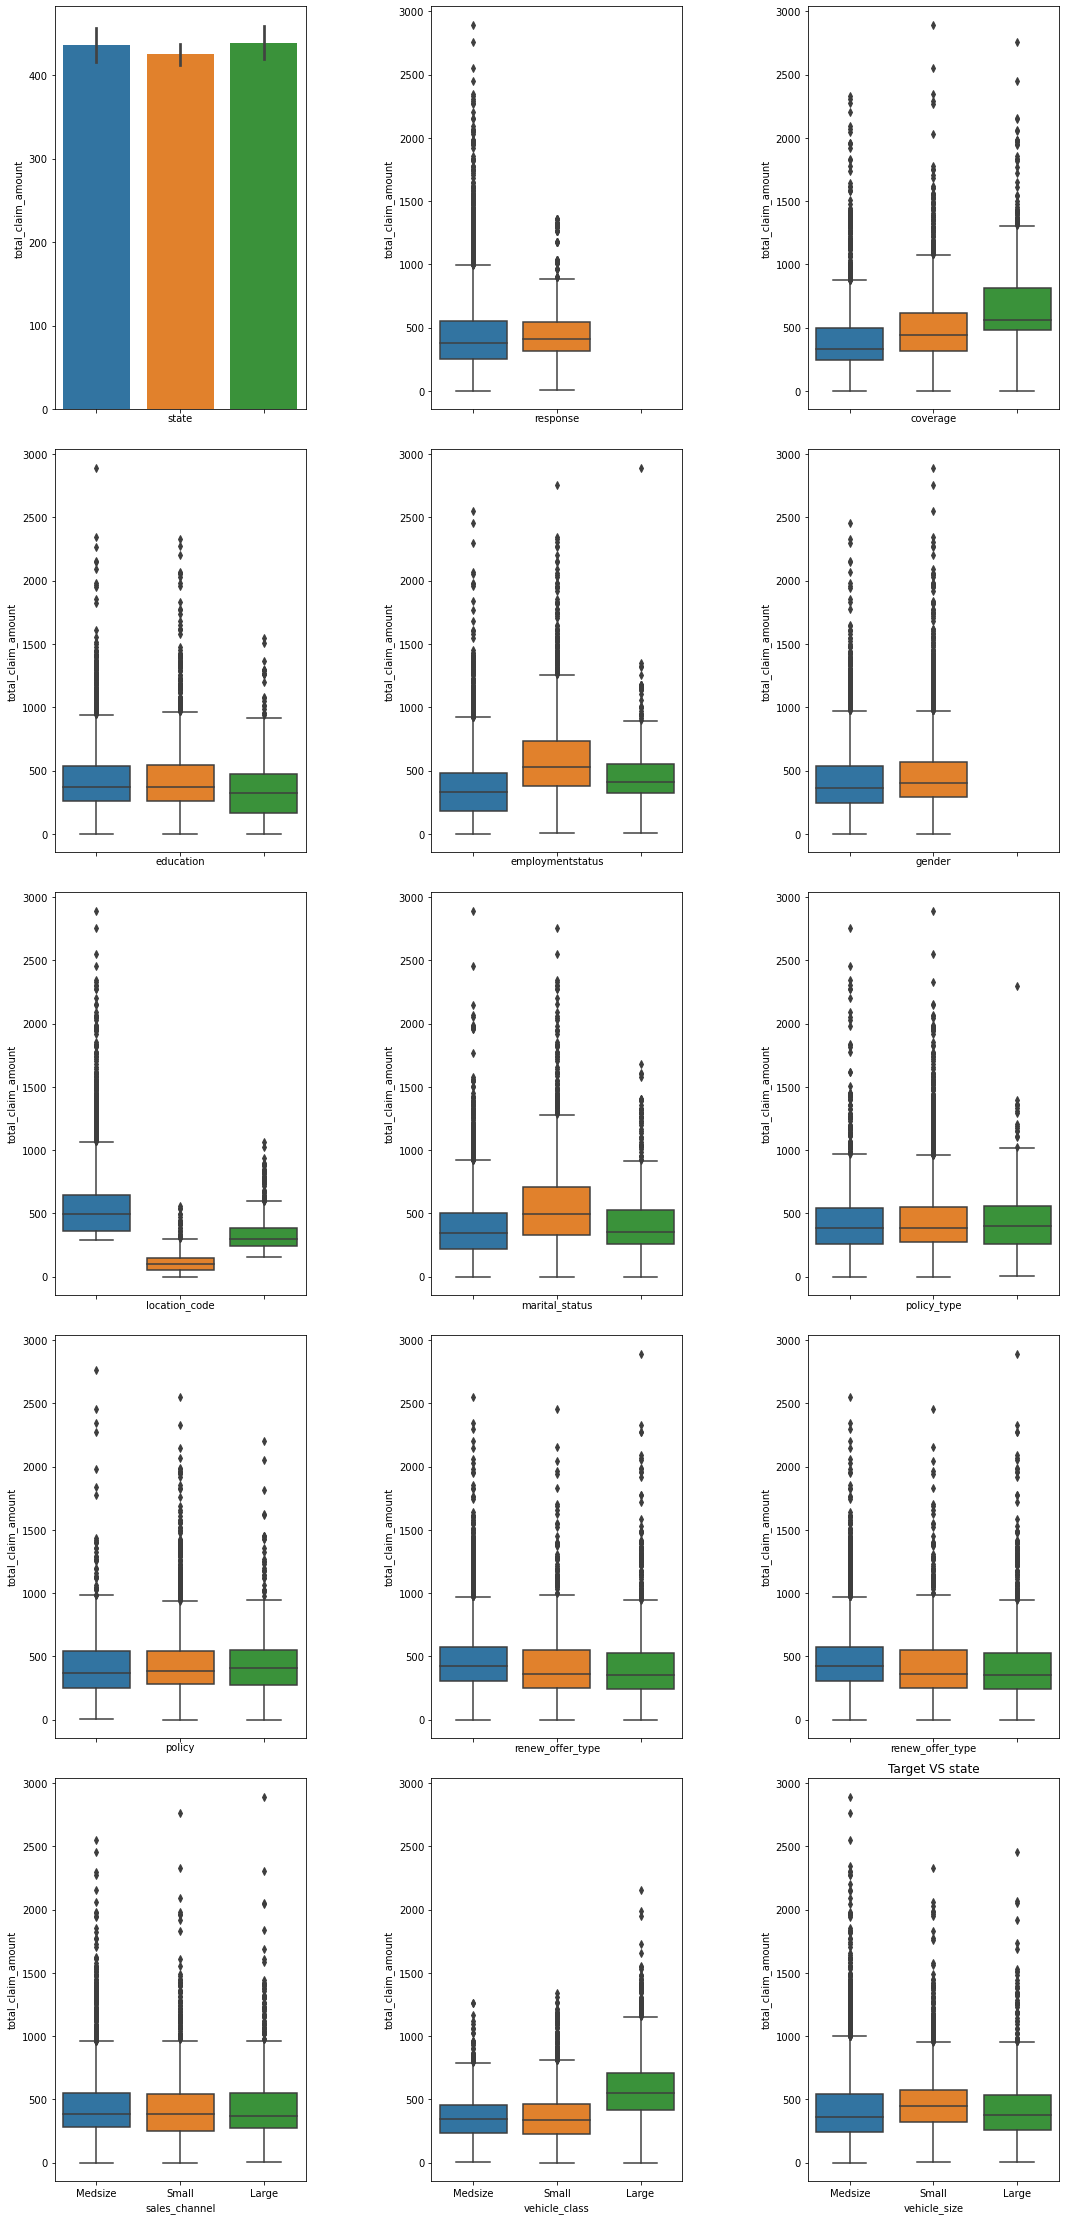

In [16]:
fig, axes = plt.subplots(5, 3, sharex=True, figsize=(18,40)) # 5 rows  x 3 columns

fig.subplots_adjust(hspace=0.1, wspace=.5) # ensure that the plots do not overlap

#fig.suptitle('Insurance claims')

sns.barplot(ax=axes[0, 0], data=customer_df, y="total_claim_amount", x="state")
sns.boxplot(ax=axes[0, 1], data=customer_df, x="response", y="total_claim_amount")
sns.boxplot(ax=axes[0, 2], data=customer_df, x="coverage", y="total_claim_amount")
sns.boxplot(ax=axes[1, 0], data=customer_df, x="education", y="total_claim_amount")
sns.boxplot(ax=axes[1, 1], data=customer_df, x="employmentstatus", y="total_claim_amount")
sns.boxplot(ax=axes[1, 2], data=customer_df, x="gender", y="total_claim_amount")
sns.boxplot(ax=axes[2, 0], data=customer_df, x="location_code", y="total_claim_amount")
sns.boxplot(ax=axes[2, 1], data=customer_df, x="marital_status", y="total_claim_amount")
sns.boxplot(ax=axes[2, 2], data=customer_df, x="policy_type", y="total_claim_amount")
sns.boxplot(ax=axes[3, 0], data=customer_df, x="policy", y="total_claim_amount")
sns.boxplot(ax=axes[3, 1], data=customer_df, x="renew_offer_type", y="total_claim_amount")
sns.boxplot(ax=axes[3, 2], data=customer_df, x="renew_offer_type", y="total_claim_amount")
sns.boxplot(ax=axes[4, 0], data=customer_df, x="sales_channel", y="total_claim_amount")
sns.boxplot(ax=axes[4, 1], data=customer_df, x="vehicle_class", y="total_claim_amount")
sns.boxplot(ax=axes[4, 2], data=customer_df, x="vehicle_size", y="total_claim_amount")

 - There is **no a strong relationship between our target and the categorical features listed below**
  - vehicle_size
  - sales_channel
  - renew_offer_type
  - policy
  - policy_type
  - gender
  - response
  - state

### 5. For the categorical data, check if there is any data cleaning that need to perform. 

Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [17]:
categorical_df.isna().sum()

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

 - There are **no null values** in the categorical data
 - Let's check for **empty values** in categorical data

In [18]:
categorical_df.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [20]:
categorical_df.state.value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [21]:
categorical_df.response.value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [22]:
categorical_df.coverage.value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [23]:
categorical_df.education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [24]:
categorical_df.employmentstatus.value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [25]:
categorical_df.gender.value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [26]:
categorical_df.location_code.value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [27]:
categorical_df.marital_status.value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [28]:
categorical_df.policy_type.value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [29]:
categorical_df.policy.value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [30]:
categorical_df.renew_offer_type.value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [31]:
categorical_df.sales_channel.value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [32]:
categorical_df.vehicle_class.value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [33]:
categorical_df.vehicle_size.value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

 - **None** of the categorical columns has **empty values**